In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("reports/cleaned_csv/Активные_кредиты_5.clean.csv", parse_dates=True)

df.shape, df.head(3)


((706, 49),
              Код                                   Клиент            ИД  \
 0  Кр-99044923-1                 Kirgizbayeva Donaxon XXX  6.093006e+09   
 1  Кр-99037287-2  Abdupattayeva Feruzaxon Shodmonbek qizi  1.052229e+09   
 2  Кр-99020700-2       Xolbekov Maxamadjalil Maxamatovich  9.642897e+09   
 
            Область           Район                                Адресс  \
 0  АНДИЖОН ВИЛОЯТИ    АСАКА ТУМАНИ  Дустлик МФЙ Юкори Асака кучаси 85-уй   
 1  АНДИЖОН ВИЛОЯТИ  АНДИЖОН ТУМАНИ    Огуллик МФЙ Сохилбуйи кучаси 72-уй   
 2  АНДИЖОН ВИЛОЯТИ    АСАКА ТУМАНИ     Ниёзботир МФЙ Фаргона кучаси 5-уй   
 
                                             Телефоны Номер договора  \
 0  978354555 (sms) 93 446 90 90 невараси бобиржон...       896/2021   
 1  975829900  (SMS) 93 784 33 77 холаси () 99 847...      1761/2021   
 2  881630002 (sms ) 99 066 41 74 аёли Мохигул  ()...      1903/2021   
 
   Дата договора    Нач.дата  ... Количество просроченных дней          Код.1  \
 

In [2]:
df.info()
df.describe().T
df.isna().mean().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Код                            706 non-null    object 
 1   Клиент                         706 non-null    object 
 2   ИД                             705 non-null    float64
 3   Область                        706 non-null    object 
 4   Район                          706 non-null    object 
 5   Адресс                         706 non-null    object 
 6   Телефоны                       706 non-null    object 
 7   Номер договора                 706 non-null    object 
 8   Дата договора                  706 non-null    object 
 9   Нач.дата                       706 non-null    object 
 10  Кон.дата                       706 non-null    object 
 11  Сумма                          706 non-null    int64  
 12  К оплате                       706 non-null    flo

ИД                         0.001416
Код                        0.000000
Клиент                     0.000000
Область                    0.000000
Район                      0.000000
Адресс                     0.000000
Телефоны                   0.000000
Номер договора             0.000000
Дата договора              0.000000
Нач.дата                   0.000000
Кон.дата                   0.000000
Сумма                      0.000000
К оплате                   0.000000
Просроченные               0.000000
Списанные на 91501         0.000000
Срок не наступил           0.000000
Итого                      0.000000
Срок погаш. не наступил    0.000000
На 12405 [Не просрочен]    0.000000
На 12405 [Просрочен]       0.000000
dtype: float64

In [4]:
summary = {
    "Total loans": len(df),
    "Unique clients": df["Клиент"].nunique(),
    "Total debt": df["Общая задолженность"].sum(),
    "Average debt per client": df["Общая задолженность"].mean(),
    "Max debt (single loan)": df["Общая задолженность"].max(),
    "Average overdue days": df["Количество просроченных дней"].mean(),
}
summary

{'Total loans': 706,
 'Unique clients': 687,
 'Total debt': np.float64(33534957275.159996),
 'Average debt per client': np.float64(47499939.48322946),
 'Max debt (single loan)': np.float64(327522109.92),
 'Average overdue days': np.float64(363.9745042492918)}

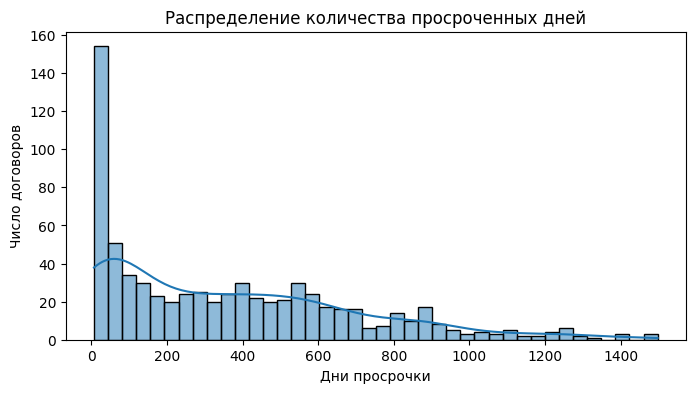

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df["Количество просроченных дней"].dropna(), bins=40, kde=True)
plt.title("Распределение количества просроченных дней")
plt.xlabel("Дни просрочки")
plt.ylabel("Число договоров")
plt.show()


/tmp/ipykernel_42484/3678906494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette="viridis")


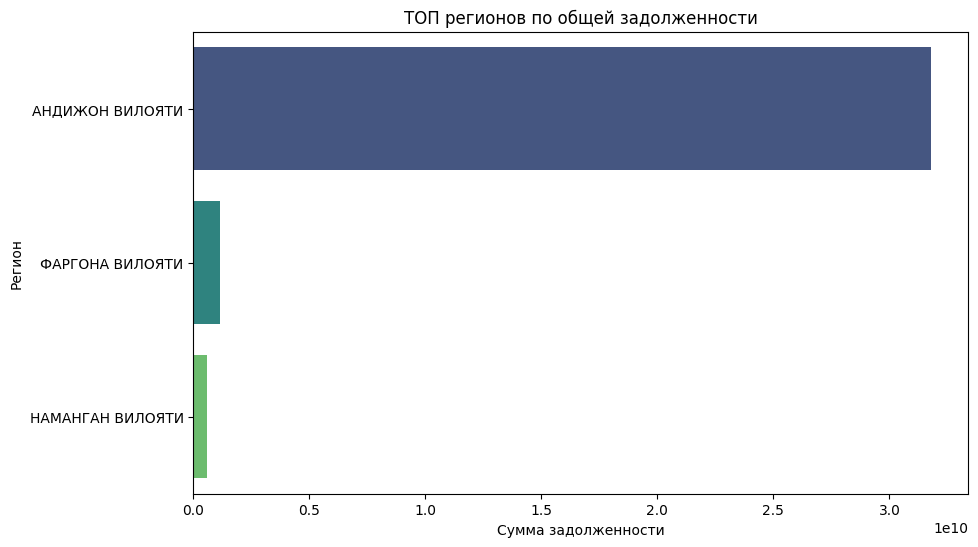

In [6]:
plt.figure(figsize=(10,6))
top_regions = df.groupby("Область")["Общая задолженность"].sum().sort_values(ascending=False).head(15)
sns.barplot(x=top_regions.values, y=top_regions.index, palette="viridis")
plt.title("ТОП регионов по общей задолженности")
plt.xlabel("Сумма задолженности")
plt.ylabel("Регион")
plt.show()


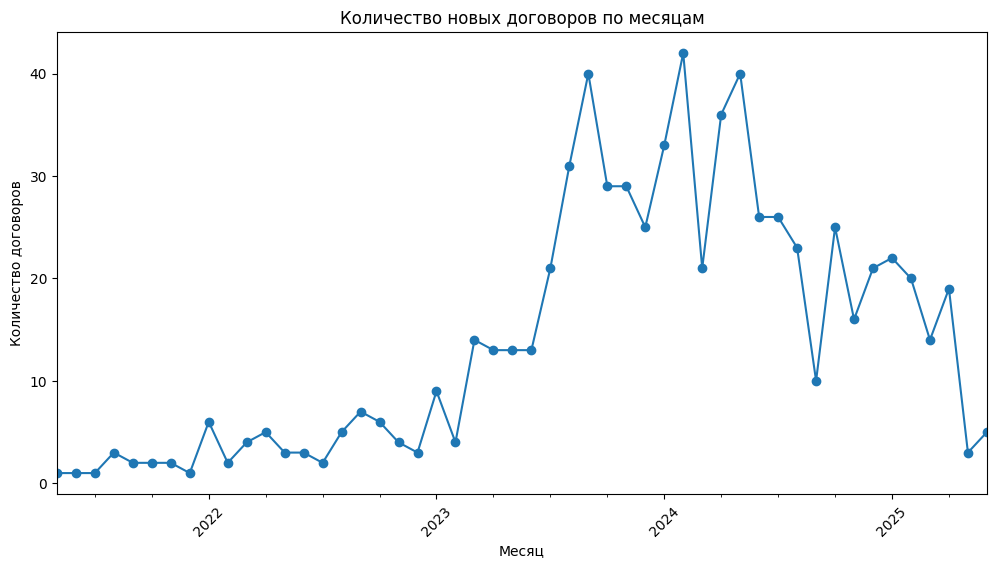

In [7]:
df["Дата договора"] = pd.to_datetime(df["Дата договора"], errors="coerce")

monthly_loans = df["Дата договора"].dt.to_period("M").value_counts().sort_index()
plt.figure(figsize=(12,6))
monthly_loans.plot(kind="line", marker="o")
plt.title("Количество новых договоров по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество договоров")
plt.xticks(rotation=45)
plt.show()


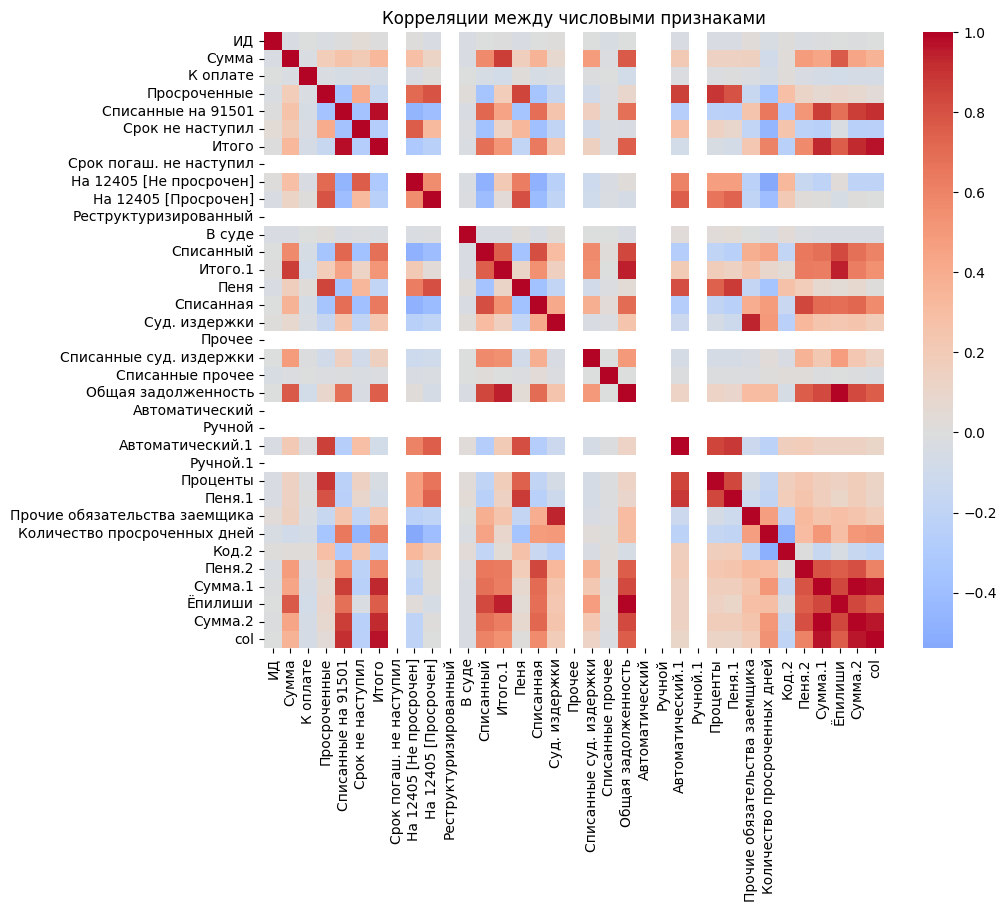

In [8]:
plt.figure(figsize=(10,8))
num_df = df.select_dtypes(include="number")
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Корреляции между числовыми признаками")
plt.show()
